In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("mas.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,0,0.0,41.0926,36.7287,326.9,1.1,1.1,2001-01-09,832,Terra,MODIS,85,6.2,287.9,31.4,D,0
1,1,1.0,36.7285,36.2117,313.6,1.1,1.0,2001-01-09,833,Terra,MODIS,56,6.2,290.4,14.1,D,0
2,2,2.0,41.2556,31.4192,307.4,1.0,1.0,2001-01-12,902,Terra,MODIS,0,6.2,283.8,9.8,D,0
3,3,3.0,36.7084,38.9258,303.0,1.1,1.0,2001-01-16,838,Terra,MODIS,54,6.2,288.0,6.4,D,0
4,4,4.0,39.0050,34.0977,304.2,1.0,1.0,2001-01-21,856,Terra,MODIS,58,6.2,280.5,8.4,D,0


In [ ]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1,inplace=True)

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='confidence', ylabel='brightness'>

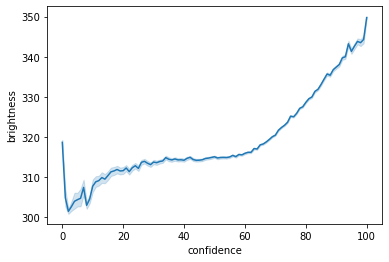

In [ ]:
sns.lineplot(df.confidence,df.brightness)

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='confidence', ylabel='bright_t31'>

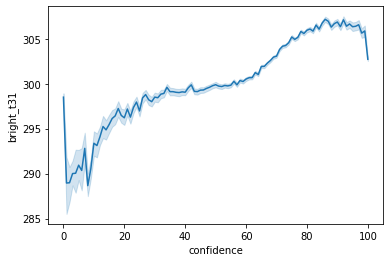

In [ ]:
sns.lineplot(df.confidence,df.bright_t31)

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='confidence', ylabel='scan'>

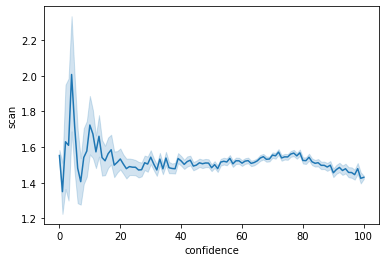

In [ ]:
sns.lineplot(df.confidence,df.scan)

In [ ]:
from mpl_toolkits.basemap import Basemap

def plot_mapinworld(df,col,name):
    fig = plt.figure(figsize=(10, 8))

    m = Basemap(projection='lcc', resolution='c',width=3.5E6, height=1.25E6,lat_0=np.max(df.latitude), lon_0=np.max(df.longitude))
    m.shadedrelief(scale=0.5)
    m.scatter(df.longitude, df.latitude, latlon=True,c=np.log10(df[col]), cmap='Reds', alpha=1,)
    m.drawcoastlines(color='lightgray')
    plt.title(str(name)+' Anomaly')
    plt.show()

ModuleNotFoundError: ignored

In [ ]:
# prof = ProfileReport(df)
# prof.to_file(output_file='profilereport')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["daynight"]=label.fit_transform(df.daynight)

In [ ]:
types = pd.get_dummies(df['type'])
df = pd.concat([df, types], axis=1)

df = df.drop(['type'], axis = 1)
df = df.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})
df.head()


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type_0,1,type_2,type_3
0,41.0926,36.7287,326.9,1.1,1.1,2001-01-09,832,Terra,MODIS,85,6.2,287.9,31.4,0,1,0,0,0
1,36.7285,36.2117,313.6,1.1,1.0,2001-01-09,833,Terra,MODIS,56,6.2,290.4,14.1,0,1,0,0,0
2,41.2556,31.4192,307.4,1.0,1.0,2001-01-12,902,Terra,MODIS,0,6.2,283.8,9.8,0,1,0,0,0
3,36.7084,38.9258,303.0,1.1,1.0,2001-01-16,838,Terra,MODIS,54,6.2,288.0,6.4,0,1,0,0,0
4,39.0050,34.0977,304.2,1.0,1.0,2001-01-21,856,Terra,MODIS,58,6.2,280.5,8.4,0,1,0,0,0


In [ ]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type_0,1,type_2,type_3
0,41.0926,36.7287,326.9,1.1,1.1,2001-01-09,832,Terra,MODIS,85,6.2,287.9,31.4,0,1,0,0,0
1,36.7285,36.2117,313.6,1.1,1.0,2001-01-09,833,Terra,MODIS,56,6.2,290.4,14.1,0,1,0,0,0
2,41.2556,31.4192,307.4,1.0,1.0,2001-01-12,902,Terra,MODIS,0,6.2,283.8,9.8,0,1,0,0,0
3,36.7084,38.9258,303.0,1.1,1.0,2001-01-16,838,Terra,MODIS,54,6.2,288.0,6.4,0,1,0,0,0
4,39.0050,34.0977,304.2,1.0,1.0,2001-01-21,856,Terra,MODIS,58,6.2,280.5,8.4,0,1,0,0,0


In [ ]:
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day'] = df['acq_date'].dt.day
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,bright_t31,frp,daynight,type_0,1,type_2,type_3,year,month,day
0,41.0926,36.7287,326.9,1.1,1.1,2001-01-09,832,Terra,MODIS,85,...,287.9,31.4,0,1,0,0,0,2001,1,9
1,36.7285,36.2117,313.6,1.1,1.0,2001-01-09,833,Terra,MODIS,56,...,290.4,14.1,0,1,0,0,0,2001,1,9
2,41.2556,31.4192,307.4,1.0,1.0,2001-01-12,902,Terra,MODIS,0,...,283.8,9.8,0,1,0,0,0,2001,1,12
3,36.7084,38.9258,303.0,1.1,1.0,2001-01-16,838,Terra,MODIS,54,...,288.0,6.4,0,1,0,0,0,2001,1,16
4,39.0050,34.0977,304.2,1.0,1.0,2001-01-21,856,Terra,MODIS,58,...,280.5,8.4,0,1,0,0,0,2001,1,21


e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


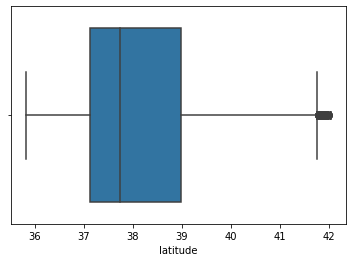

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


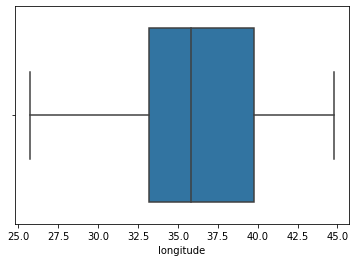

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


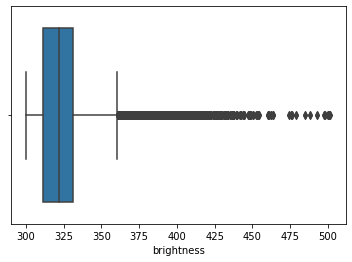

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


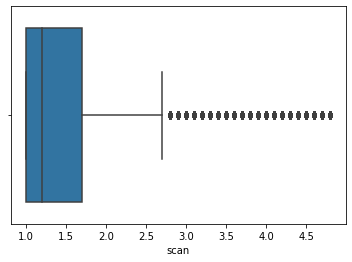

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


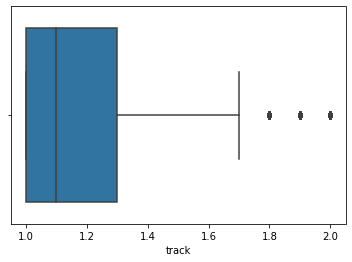

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

In [ ]:
for i in df.columns:
    if(df[i].dtype!='object'):
        sns.boxplot(df[i])
        plt.show()

<AxesSubplot: >

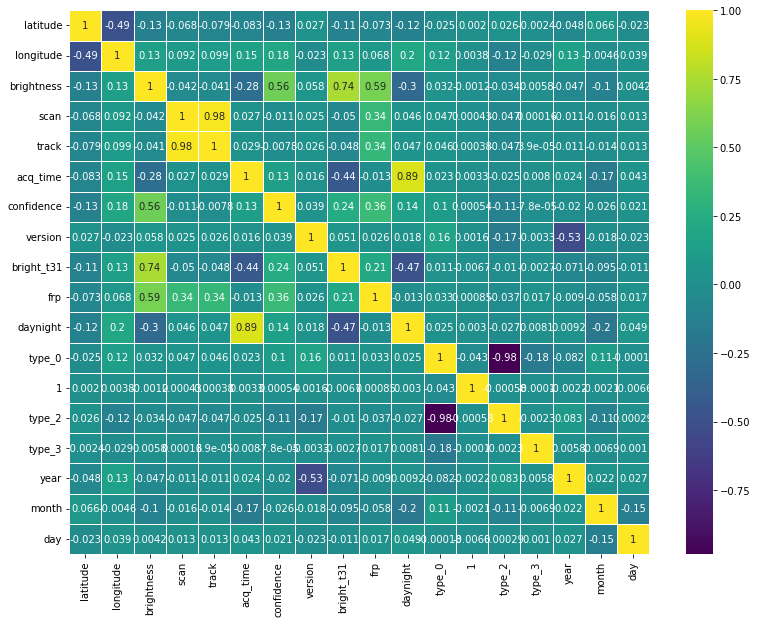

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

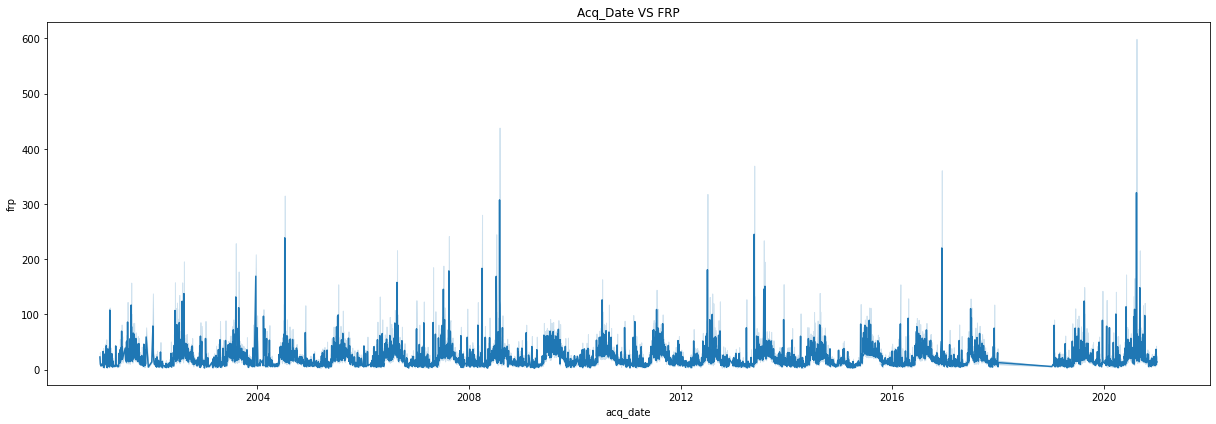

In [ ]:
figure = plt.figure(figsize=(17,6))
sns.lineplot(x=df["acq_date"],y=df["frp"])
plt.title("Acq_Date VS FRP")
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,bright_t31,frp,daynight,type_0,1,type_2,type_3,year,month,day
0,41.0926,36.7287,326.9,1.1,1.1,2001-01-09,832,Terra,MODIS,85,...,287.9,31.4,0,1,0,0,0,2001,1,9
1,36.7285,36.2117,313.6,1.1,1.0,2001-01-09,833,Terra,MODIS,56,...,290.4,14.1,0,1,0,0,0,2001,1,9
2,41.2556,31.4192,307.4,1.0,1.0,2001-01-12,902,Terra,MODIS,0,...,283.8,9.8,0,1,0,0,0,2001,1,12
3,36.7084,38.9258,303.0,1.1,1.0,2001-01-16,838,Terra,MODIS,54,...,288.0,6.4,0,1,0,0,0,2001,1,16
4,39.0050,34.0977,304.2,1.0,1.0,2001-01-21,856,Terra,MODIS,58,...,280.5,8.4,0,1,0,0,0,2001,1,21


e:\Important\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


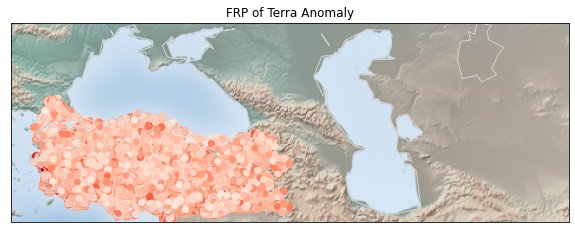

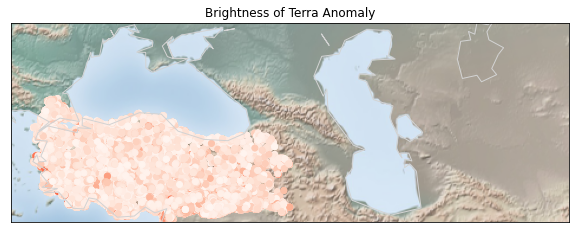

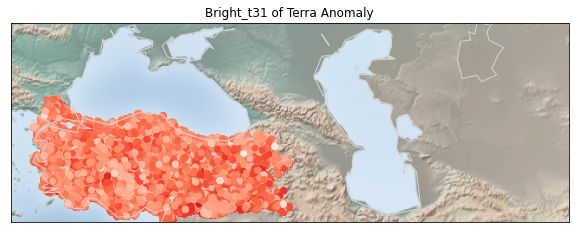

In [ ]:
df_Terra=df[df['satellite']=="Terra"]
plot_mapinworld(df_Terra,"frp","FRP of Terra")
plot_mapinworld(df_Terra,"brightness","Brightness of Terra")
plot_mapinworld(df_Terra,"bright_t31","Bright_t31 of Terra")

e:\Important\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


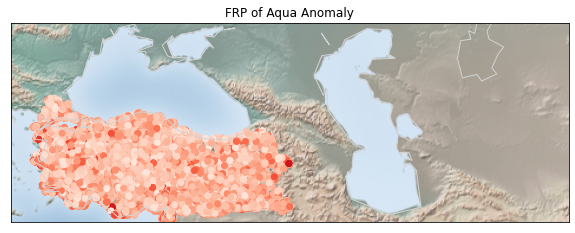

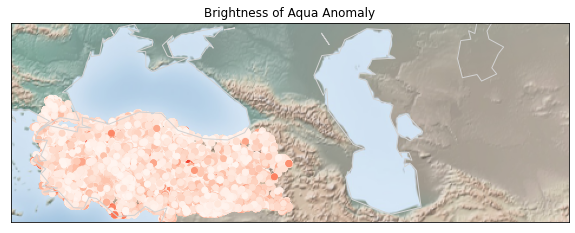

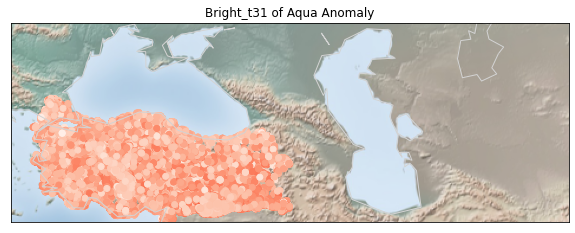

In [ ]:
df_Aqua=df[df['satellite']=="Aqua"]
plot_mapinworld(df_Aqua,"frp","FRP of Aqua")
plot_mapinworld(df_Aqua,"brightness","Brightness of Aqua")
plot_mapinworld(df_Aqua,"bright_t31","Bright_t31 of Aqua")

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='year', ylabel='confidence'>

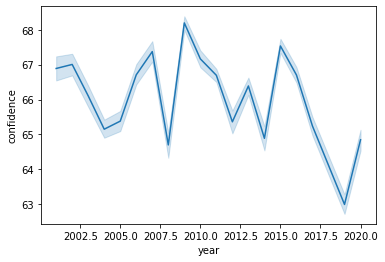

In [ ]:
sns.lineplot(df['year'],df['confidence'])

In [ ]:
year_list=df.year.value_counts().to_frame()
year_list=np.array(sorted(year_list.index))
year_list

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2019, 2020])

In [ ]:
df.year.dtype

dtype('int64')

In [ ]:


lat,lon,brightness=[],[],[]
for i in year_list:
    d=df[df['year']==i]
    lat.append(np.mean(d.latitude))
    lon.append(np.mean(d.longitude))
    brightness.append(np.mean(d.brightness))




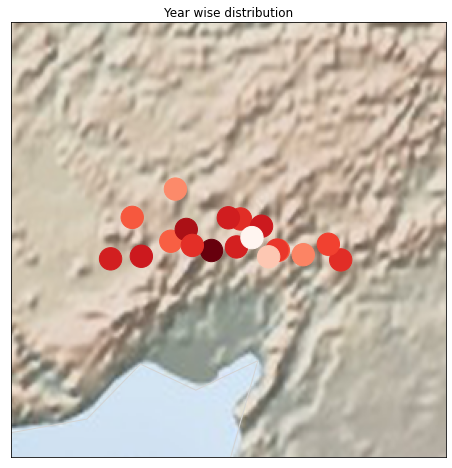

In [ ]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',width=0.5E6, height=0.5E6,lat_0=np.mean(lat), lon_0=np.mean(lon))
m.shadedrelief(scale=2)
m.drawcoastlines(color='lightgray')
m.scatter(lon, lat, latlon=True,c=np.log10(brightness), cmap='Reds', alpha=1,s=500)
plt.title("Year wise distribution")
plt.show()

In [ ]:
brightness

[323.3795815575345,
 323.67205925065423,
 323.79085736454266,
 322.66553600810005,
 322.5557750210767,
 324.44122000211587,
 325.2940393584334,
 323.69500324464605,
 323.7305220481512,
 323.7932835274285,
 321.8080639046842,
 323.3502740688686,
 322.6573300928757,
 323.2058901098887,
 323.38094422024415,
 323.0018173791498,
 321.9124426844494,
 319.4915418713319,
 320.69749830201584]

In [ ]:
confidence_list_for_year=[]
for i in year_list:
    d=df[df['year']==i]
    confidence_list_for_year.append(np.mean(d.confidence))

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graph of Year & Confidence(average of per year)')

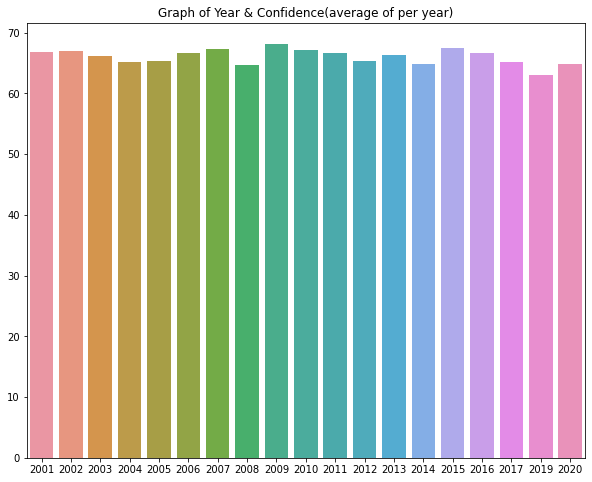

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(year_list,confidence_list_for_year)
plt.title("Graph of Year & Confidence(average of per year)")

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='version', ylabel='confidence'>

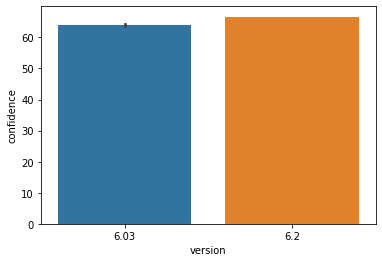

In [ ]:
sns.barplot(df.version,df.confidence)

In [ ]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,bright_t31,frp,daynight,type_0,1,type_2,type_3,year,month,day
0,41.0926,36.7287,326.9,1.1,1.1,2001-01-09,832,Terra,MODIS,85,...,287.9,31.4,0,1,0,0,0,2001,1,9
1,36.7285,36.2117,313.6,1.1,1.0,2001-01-09,833,Terra,MODIS,56,...,290.4,14.1,0,1,0,0,0,2001,1,9
2,41.2556,31.4192,307.4,1.0,1.0,2001-01-12,902,Terra,MODIS,0,...,283.8,9.8,0,1,0,0,0,2001,1,12
3,36.7084,38.9258,303.0,1.1,1.0,2001-01-16,838,Terra,MODIS,54,...,288.0,6.4,0,1,0,0,0,2001,1,16
4,39.0050,34.0977,304.2,1.0,1.0,2001-01-21,856,Terra,MODIS,58,...,280.5,8.4,0,1,0,0,0,2001,1,21


In [ ]:
satellite = pd.get_dummies(df['satellite'])
df = pd.concat([df, satellite], axis=1)

df = df.drop(['satellite','Aqua'], axis = 1)

# df = df.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})
df.head()

KeyError: 'satellite'

In [ ]:
df.drop(['instrument','acq_date','day','year'],axis=1,inplace=True)

In [ ]:
df.head()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,daynight,type_0,1,type_2,type_3,month,Terra
0,41.0926,36.7287,326.9,1.1,1.1,832,85,6.2,287.9,31.4,0,1,0,0,0,1,1
1,36.7285,36.2117,313.6,1.1,1.0,833,56,6.2,290.4,14.1,0,1,0,0,0,1,1
2,41.2556,31.4192,307.4,1.0,1.0,902,0,6.2,283.8,9.8,0,1,0,0,0,1,1
3,36.7084,38.9258,303.0,1.1,1.0,838,54,6.2,288.0,6.4,0,1,0,0,0,1,1
4,39.0050,34.0977,304.2,1.0,1.0,856,58,6.2,280.5,8.4,0,1,0,0,0,1,1


<AxesSubplot: >

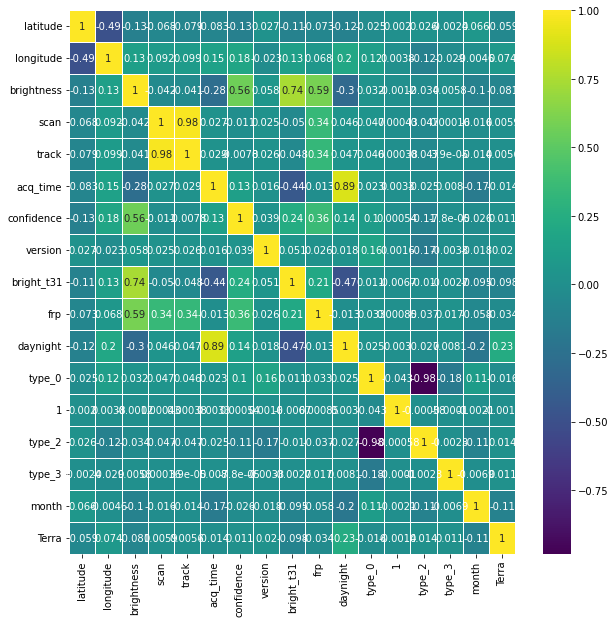

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='track', ylabel='confidence'>

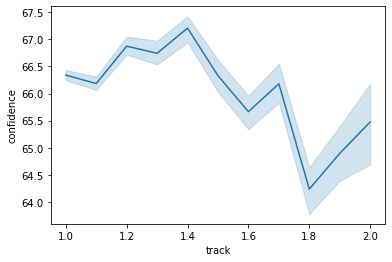

In [ ]:
sns.lineplot(df.track,df.confidence)

In [ ]:
df.columns

Index([  'latitude',  'longitude', 'brightness',       'scan',      'track',
         'acq_time', 'confidence',    'version', 'bright_t31',        'frp',
         'daynight',     'type_0',            1,     'type_2',     'type_3',
            'month',      'Terra'],
      dtype='object')

In [ ]:
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional,SimpleRNN,InputLayer,BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.layers import Input
from keras import regularizers